In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from textblob import TextBlob
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from time import time

In [2]:
df_train_data = pd.read_csv('data/cleaned_train.csv')
df_test_data = pd.read_csv('data/cleaned_test.csv')

In [3]:
df_train_data.head()

,tweet,target
0,dived many times for the ball managed to save ...,0
1,not the whole crew,0
2,nope they did not have it,0
3,spring break in plain city it snowing,0
4,could not bear to watch it and thought the ua ...,0


In [4]:
df_test_data.head()

,tweet,target
0,my legs are actually killing me went for bath ...,0
1,do you need personal chef still working out my...,0
2,about to do piano exam freaking out,0
3,tomorrow will be my last day being flohoe gonn...,0
4,hate thunder,0


### Split Training and Validation Data

In [12]:
X_train, X_validation, y_train, y_validation = train_test_split(df_train_data.tweet, df_train_data.target, test_size = 0.02, random_state = 1234)

print("training data has {0} entries. {1:.2f}% positive and {2:.2f}% negative".format(len(y_train), len(y_train[y_train==1])/len(y_train)*100, len(y_train[y_train==0])/len(y_train)*100))
print("validation data has {0} entries. {1:.2f}% positive and {2:.2f}% negative".format(len(y_validation), len(y_validation[y_validation==1])/len(y_validation)*100, len(y_validation[y_validation==0])/len(y_validation)*100))

training data has 552354 entries. 49.63% positive and 50.37% negative
validation data has 11273 entries. 49.72% positive and 50.28% negative


In [ ]:
print("{}. {} appears {} times.".format(i, key, wordBank[key]))

In [9]:
len(y_train[y_train==1])/len(y_train)

0.49634292500823746

### Sentiment Pred with TextBlob

In [17]:
tb_sentiment = [TextBlob(i).sentiment.polarity for i in X_validation]
tb_sentiment = [0 if x < 0 else 1 for x in tb_sentiment]

In [26]:
cm = confusion_matrix(y_validation, tb_sentiment)
cm

array([[1834, 3834],
       [ 612, 4993]], dtype=int64)

In [27]:
print("accuracy = {:.2f}".format(accuracy_score(y_validation, tb_sentiment)))
print(classification_report(y_validation, tb_sentiment))

accuracy = 0.61
              precision    recall  f1-score   support

           0       0.75      0.32      0.45      5668
           1       0.57      0.89      0.69      5605

   micro avg       0.61      0.61      0.61     11273
   macro avg       0.66      0.61      0.57     11273
weighted avg       0.66      0.61      0.57     11273



### Naive Bayes Model

In [47]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

In [42]:
vectorizer = CountVectorizer()
clf = MultinomialNB()
n_features = np.arange(10000, 100001, 10000)

In [68]:
def calc_accuracy(pipeline, X_train, X_test, y_train, y_test):
    t0 = time()
    sentiment_clf = pipeline.fit(X_train, y_train)
    y_pred = sentiment_clf.predict(X_test)
    train_test_time = time() - t0
    accuracy = accuracy_score(y_test, y_pred)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    fpr, tpr, _ = roc_curve(y_test, y_pred, pos_label=1)
    roc_auc = auc(fpr, tpr)
    
    print("model accuracy : {0:.2f}".format(accuracy))
    print("model auc : {0:.2f}".format(roc_auc))
    print("train validation time : {0:.2f}s".format(train_test_time))
    print("=========================================================")
    
    return accuracy, roc_auc, train_test_time

In [69]:
def compare_clf_nfeature(X_train, X_test, y_train, y_test, vectorizer=vectorizer, clf=clf, n_features=n_features, stop_words=None, ngram_range = (1,1)):
    res = []
    print(clf)
    for feature in n_features:
        vectorizer.set_params(stop_words=stop_words, ngram_range=ngram_range, max_features=feature)
        acc_pipeline = Pipeline([('vectorizer', vectorizer), ('classifier', clf)])
        print("result on model with {} features".format(feature))
        accuracy, auc, time = calc_accuracy(acc_pipeline, X_train, X_test, y_train, y_test)
        res.append((feature, accuracy, auc, time))
        
    return res

In [73]:
df_word_freq = pd.read_csv('data/word_freq.csv')
df_word_freq.columns = ['word', 'neg', 'pos', 'total']
df_word_freq.head()

,word,neg,pos,total
0,to,313164,252567,565731
1,the,257870,266013,523883
2,not,238226,103119,341345
3,my,190845,125979,316824
4,it,157482,147804,305286


In [82]:
custom_stop_words = list(df_word_freq.head(20).word)

### Investigate stopwords effect

In [70]:
res_w_sw = compare_clf_nfeature(X_train, X_validation, y_train, y_validation)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
result on model with 10000 features
model accuracy : 0.77
model auc : 0.77
train validation time : 9.48s
result on model with 20000 features
model accuracy : 0.77
model auc : 0.77
train validation time : 9.76s
result on model with 30000 features
model accuracy : 0.77
model auc : 0.77
train validation time : 10.10s
result on model with 40000 features
model accuracy : 0.77
model auc : 0.77
train validation time : 10.14s
result on model with 50000 features
model accuracy : 0.77
model auc : 0.77
train validation time : 12.63s
result on model with 60000 features
model accuracy : 0.77
model auc : 0.77
train validation time : 12.87s
result on model with 70000 features
model accuracy : 0.77
model auc : 0.77
train validation time : 10.48s
result on model with 80000 features
model accuracy : 0.77
model auc : 0.77
train validation time : 10.51s
result on model with 90000 features
model accuracy : 0.77
model auc : 0.77
train validation tim

In [71]:
res_wo_sw = compare_clf_nfeature(X_train, X_validation, y_train, y_validation, stop_words='english')

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
result on model with 10000 features
model accuracy : 0.75
model auc : 0.75
train validation time : 9.18s
result on model with 20000 features
model accuracy : 0.75
model auc : 0.75
train validation time : 9.21s
result on model with 30000 features
model accuracy : 0.76
model auc : 0.76
train validation time : 9.51s
result on model with 40000 features
model accuracy : 0.76
model auc : 0.76
train validation time : 9.13s
result on model with 50000 features
model accuracy : 0.76
model auc : 0.76
train validation time : 9.18s
result on model with 60000 features
model accuracy : 0.75
model auc : 0.75
train validation time : 9.36s
result on model with 70000 features
model accuracy : 0.75
model auc : 0.75
train validation time : 9.44s
result on model with 80000 features
model accuracy : 0.75
model auc : 0.75
train validation time : 9.14s
result on model with 90000 features
model accuracy : 0.75
model auc : 0.75
train validation time : 9.

In [83]:
res_cust_sw = compare_clf_nfeature(X_train, X_validation, y_train, y_validation, stop_words=custom_stop_words)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
result on model with 10000 features
model accuracy : 0.76
model auc : 0.76
train validation time : 10.54s
result on model with 20000 features
model accuracy : 0.76
model auc : 0.76
train validation time : 10.58s
result on model with 30000 features
model accuracy : 0.76
model auc : 0.76
train validation time : 10.99s
result on model with 40000 features
model accuracy : 0.77
model auc : 0.77
train validation time : 10.21s
result on model with 50000 features
model accuracy : 0.77
model auc : 0.77
train validation time : 10.15s
result on model with 60000 features
model accuracy : 0.77
model auc : 0.77
train validation time : 10.59s
result on model with 70000 features
model accuracy : 0.77
model auc : 0.77
train validation time : 10.46s
result on model with 80000 features
model accuracy : 0.77
model auc : 0.77
train validation time : 10.16s
result on model with 90000 features
model accuracy : 0.76
model auc : 0.76
train validation t

In [84]:
cols = ['n_features', 'val_acc', 'val_auc', 'time']
res_w_sw = pd.DataFrame(res_w_sw, columns=cols)
res_wo_sw = pd.DataFrame(res_wo_sw, columns=cols)
res_cust_sw = pd.DataFrame(res_cust_sw, columns=cols)

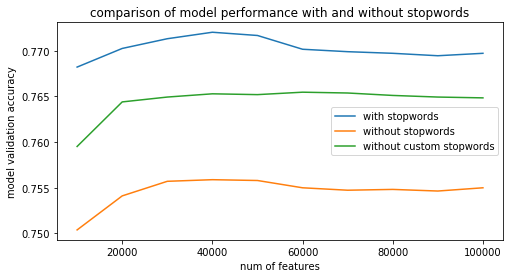

In [90]:
plt.figure(figsize=(8,4))
plt.plot(res_w_sw.n_features, res_w_sw.val_acc, label='with stopwords')
plt.plot(res_wo_sw.n_features, res_wo_sw.val_acc, label='without stopwords')
plt.plot(res_cust_sw.n_features, res_cust_sw.val_acc, label='without custom stopwords')
plt.title("comparison of model performance with and without stopwords")
plt.xlabel("num of features")
plt.ylabel("model validation accuracy")
plt.legend()

### Investigate gram length effect

In [92]:
res_bigram = compare_clf_nfeature(X_train, X_validation, y_train, y_validation, ngram_range=(1,2))

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
result on model with 10000 features
model accuracy : 0.78
model auc : 0.78
train validation time : 33.83s
result on model with 20000 features
model accuracy : 0.78
model auc : 0.78
train validation time : 37.55s
result on model with 30000 features
model accuracy : 0.78
model auc : 0.78
train validation time : 40.02s
result on model with 40000 features
model accuracy : 0.78
model auc : 0.78
train validation time : 37.86s
result on model with 50000 features
model accuracy : 0.79
model auc : 0.79
train validation time : 36.06s
result on model with 60000 features
model accuracy : 0.78
model auc : 0.78
train validation time : 34.42s
result on model with 70000 features
model accuracy : 0.79
model auc : 0.79
train validation time : 31.55s
result on model with 80000 features
model accuracy : 0.79
model auc : 0.79
train validation time : 33.47s
result on model with 90000 features
model accuracy : 0.79
model auc : 0.79
train validation t

In [93]:
res_trigram = compare_clf_nfeature(X_train, X_validation, y_train, y_validation, ngram_range=(1,3))

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
result on model with 10000 features
model accuracy : 0.77
model auc : 0.77
train validation time : 64.33s
result on model with 20000 features
model accuracy : 0.78
model auc : 0.78
train validation time : 66.61s
result on model with 30000 features
model accuracy : 0.78
model auc : 0.78
train validation time : 65.97s
result on model with 40000 features
model accuracy : 0.78
model auc : 0.78
train validation time : 64.03s
result on model with 50000 features
model accuracy : 0.79
model auc : 0.79
train validation time : 66.67s
result on model with 60000 features
model accuracy : 0.79
model auc : 0.79
train validation time : 70.58s
result on model with 70000 features
model accuracy : 0.79
model auc : 0.79
train validation time : 68.12s
result on model with 80000 features
model accuracy : 0.79
model auc : 0.79
train validation time : 71.89s
result on model with 90000 features
model accuracy : 0.79
model auc : 0.79
train validation t

In [95]:
res_bigram = pd.DataFrame(res_bigram, columns=cols)
res_trigram = pd.DataFrame(res_trigram, columns=cols)

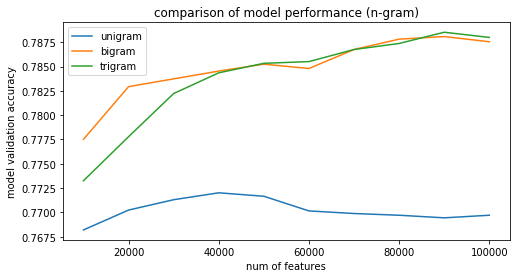

In [96]:
plt.figure(figsize=(8,4))
plt.plot(res_w_sw.n_features, res_w_sw.val_acc, label='unigram')
plt.plot(res_bigram.n_features, res_bigram.val_acc, label='bigram')
plt.plot(res_trigram.n_features, res_trigram.val_acc, label='trigram')
plt.title("comparison of model performance (n-gram)")
plt.xlabel("num of features")
plt.ylabel("model validation accuracy")
plt.legend()

### Lemmatize

In [118]:
from nltk.stem import WordNetLemmatizer

In [119]:
normalizer = WordNetLemmatizer()

In [120]:
df_train_data_2 = df_train_data.copy()
df_train_data_2['tweet'] = [' '.join([normalizer.lemmatize(word) for word in t.split()]) for t in df_train_data_2['tweet'].tolist()]
X_train, X_validation, y_train, y_validation = train_test_split(df_train_data.tweet, df_train_data.target, test_size = 0.02, random_state = 1234)

In [134]:
res_trigram_lemma = compare_clf_nfeature(X_train, X_validation, y_train, y_validation, ngram_range=(1,3))

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
result on model with 10000 features
model accuracy : 0.77
model auc : 0.77
train validation time : 61.62s
result on model with 20000 features
model accuracy : 0.78
model auc : 0.78
train validation time : 60.82s
result on model with 30000 features
model accuracy : 0.78
model auc : 0.78
train validation time : 60.77s
result on model with 40000 features
model accuracy : 0.78
model auc : 0.78
train validation time : 61.48s
result on model with 50000 features
model accuracy : 0.79
model auc : 0.79
train validation time : 60.92s
result on model with 60000 features
model accuracy : 0.79
model auc : 0.79
train validation time : 62.44s
result on model with 70000 features
model accuracy : 0.79
model auc : 0.79
train validation time : 61.14s
result on model with 80000 features
model accuracy : 0.79
model auc : 0.79
train validation time : 61.72s
result on model with 90000 features
model accuracy : 0.79
model auc : 0.79
train validation t

### Stem

In [121]:
from nltk.stem import PorterStemmer

In [135]:
normalizer = PorterStemmer()

In [136]:
df_train_data_2 = df_train_data.copy()
df_train_data_2['tweet'] = [' '.join([normalizer.stem(word) for word in t.split()]) for t in df_train_data_2['tweet'].tolist()]
X_train, X_validation, y_train, y_validation = train_test_split(df_train_data.tweet, df_train_data.target, test_size = 0.02, random_state = 1234)

In [141]:
df_train_data_2.tail()

,tweet,target
563622,neveer think that you both will get on well wi...,1
563623,im glad ur do well,1
563624,wooooo xbox is back,1
563625,thewdb com veri cool to hear old walt interview,1
563626,are you readi for your mojo makeov ask me for ...,1


In [137]:
res_trigram_stem = compare_clf_nfeature(X_train, X_validation, y_train, y_validation, ngram_range=(1,3))

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
result on model with 10000 features
model accuracy : 0.77
model auc : 0.77
train validation time : 61.75s
result on model with 20000 features
model accuracy : 0.78
model auc : 0.78
train validation time : 62.42s
result on model with 30000 features
model accuracy : 0.78
model auc : 0.78
train validation time : 60.77s
result on model with 40000 features
model accuracy : 0.78
model auc : 0.78
train validation time : 60.96s
result on model with 50000 features
model accuracy : 0.79
model auc : 0.79
train validation time : 61.25s
result on model with 60000 features
model accuracy : 0.79
model auc : 0.79
train validation time : 61.16s
result on model with 70000 features
model accuracy : 0.79
model auc : 0.79
train validation time : 65.32s
result on model with 80000 features
model accuracy : 0.79
model auc : 0.79
train validation time : 61.91s
result on model with 90000 features
model accuracy : 0.79
model auc : 0.79
train validation t

In [138]:
res_trigram_lemma = pd.DataFrame(res_trigram_lemma, columns=cols)
res_trigram_stem = pd.DataFrame(res_trigram_stem, columns=cols)

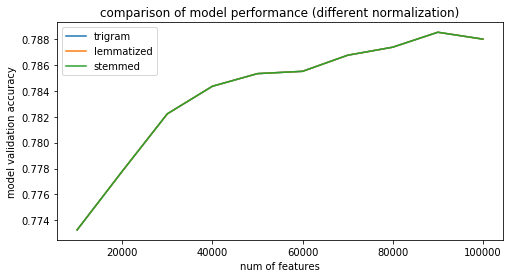

In [139]:
plt.figure(figsize=(8,4))
plt.plot(res_trigram.n_features, res_trigram.val_acc, label='trigram')
plt.plot(res_trigram_lemma.n_features, res_trigram_lemma.val_acc, label='lemmatized')
plt.plot(res_trigram_stem.n_features, res_trigram_stem.val_acc, label='stemmed')
plt.title("comparison of model performance (different normalization)")
plt.xlabel("num of features")
plt.ylabel("model validation accuracy")
plt.legend()

### TfIdf

In [164]:
X_train, X_validation, y_train, y_validation = train_test_split(df_train_data.tweet, df_train_data.target, test_size = 0.02, random_state = 1234)
tf_vectorizer = TfidfVectorizer()
res_tfidf_trigram = compare_clf_nfeature(X_train, X_validation, y_train, y_validation, ngram_range=(1,3), vectorizer=tf_vectorizer)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
result on model with 10000 features
model accuracy : 0.77
model auc : 0.77
train validation time : 62.29s
result on model with 20000 features
model accuracy : 0.78
model auc : 0.78
train validation time : 62.61s
result on model with 30000 features
model accuracy : 0.78
model auc : 0.78
train validation time : 63.13s
result on model with 40000 features
model accuracy : 0.79
model auc : 0.79
train validation time : 62.08s
result on model with 50000 features
model accuracy : 0.79
model auc : 0.79
train validation time : 73.89s
result on model with 60000 features
model accuracy : 0.79
model auc : 0.79
train validation time : 79.02s
result on model with 70000 features
model accuracy : 0.79
model auc : 0.79
train validation time : 73.50s
result on model with 80000 features
model accuracy : 0.79
model auc : 0.79
train validation time : 76.17s
result on model with 90000 features
model accuracy : 0.79
model auc : 0.79
train validation t

In [165]:
res_tfidf_bigram = compare_clf_nfeature(X_train, X_validation, y_train, y_validation, ngram_range=(1,2), vectorizer=tf_vectorizer)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
result on model with 10000 features
model accuracy : 0.78
model auc : 0.78
train validation time : 44.23s
result on model with 20000 features
model accuracy : 0.78
model auc : 0.78
train validation time : 48.16s
result on model with 30000 features
model accuracy : 0.78
model auc : 0.78
train validation time : 39.36s
result on model with 40000 features
model accuracy : 0.79
model auc : 0.79
train validation time : 39.97s
result on model with 50000 features
model accuracy : 0.79
model auc : 0.79
train validation time : 43.82s
result on model with 60000 features
model accuracy : 0.79
model auc : 0.79
train validation time : 42.67s
result on model with 70000 features
model accuracy : 0.79
model auc : 0.79
train validation time : 41.87s
result on model with 80000 features
model accuracy : 0.79
model auc : 0.79
train validation time : 42.38s
result on model with 90000 features
model accuracy : 0.79
model auc : 0.79
train validation t

In [166]:
res_tfidf_unigram = compare_clf_nfeature(X_train, X_validation, y_train, y_validation, ngram_range=(1,1), vectorizer=tf_vectorizer)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
result on model with 10000 features
model accuracy : 0.76
model auc : 0.76
train validation time : 14.77s
result on model with 20000 features
model accuracy : 0.76
model auc : 0.76
train validation time : 14.33s
result on model with 30000 features
model accuracy : 0.76
model auc : 0.76
train validation time : 16.02s
result on model with 40000 features
model accuracy : 0.76
model auc : 0.76
train validation time : 15.08s
result on model with 50000 features
model accuracy : 0.76
model auc : 0.76
train validation time : 14.57s
result on model with 60000 features
model accuracy : 0.76
model auc : 0.76
train validation time : 14.62s
result on model with 70000 features
model accuracy : 0.76
model auc : 0.76
train validation time : 15.12s
result on model with 80000 features
model accuracy : 0.76
model auc : 0.76
train validation time : 14.61s
result on model with 90000 features
model accuracy : 0.76
model auc : 0.76
train validation t

In [167]:
res_tfidf_unigram = pd.DataFrame(res_tfidf_unigram, columns=cols)
res_tfidf_bigram = pd.DataFrame(res_tfidf_bigram, columns=cols)
res_tfidf_trigram = pd.DataFrame(res_tfidf_trigram, columns=cols)

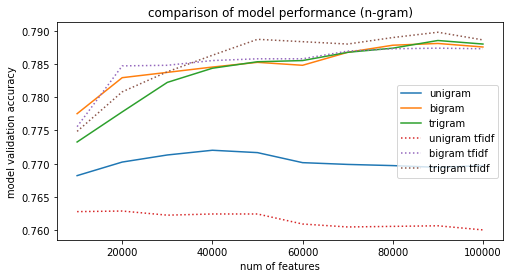

In [168]:
plt.figure(figsize=(8,4))
plt.plot(res_w_sw.n_features, res_w_sw.val_acc, label='unigram')
plt.plot(res_bigram.n_features, res_bigram.val_acc, label='bigram')
plt.plot(res_trigram.n_features, res_trigram.val_acc, label='trigram')
plt.plot(res_tfidf_unigram.n_features, res_tfidf_unigram.val_acc, label='unigram tfidf', linestyle=':')
plt.plot(res_tfidf_bigram.n_features, res_tfidf_bigram.val_acc, label='bigram tfidf', linestyle=':')
plt.plot(res_tfidf_trigram.n_features, res_tfidf_trigram.val_acc, label='trigram tfidf', linestyle=':')
plt.title("comparison of model performance (n-gram)")
plt.xlabel("num of features")
plt.ylabel("model validation accuracy")
plt.legend()

### Final NB Model

In [5]:
def plot_cm(cm):
    labels = ['negative', 'positive']
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title('Confusion matrix of the sentiment analysis')
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

#### Count

In [144]:
X_train, y_train = df_train_data.tweet, df_train_data.target
X_test, y_test = df_test_data.tweet, df_test_data.target

In [145]:
clf = MultinomialNB()
vectorizer = CountVectorizer(ngram_range=(1,3), max_features=90000)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [146]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

acc_score = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(acc_score)
print(cm)

0.795963
[[398094 101906]
 [102131 397869]]


In [152]:
397869 / (397869 + 102131 )

0.795738

              precision    recall  f1-score   support

           0     0.7958    0.7962    0.7960    500000
           1     0.7961    0.7957    0.7959    500000

   micro avg     0.7960    0.7960    0.7960   1000000
   macro avg     0.7960    0.7960    0.7960   1000000
weighted avg     0.7960    0.7960    0.7960   1000000



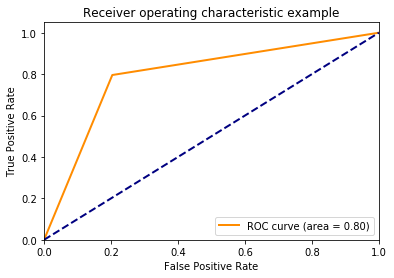

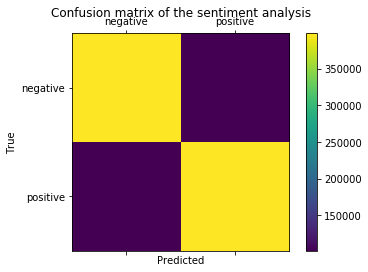

In [154]:
print(classification_report(y_test, y_pred, digits=4))
fpr = dict()
tpr = dict()
roc_auc = dict()

fpr, tpr, _ = roc_curve(y_test, y_pred, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

plot_cm(cm)

#### TF-Idf

0.797387
[[400050  99950]
 [102663 397337]]
              precision    recall  f1-score   support

           0     0.7958    0.8001    0.7979    500000
           1     0.7990    0.7947    0.7968    500000

   micro avg     0.7974    0.7974    0.7974   1000000
   macro avg     0.7974    0.7974    0.7974   1000000
weighted avg     0.7974    0.7974    0.7974   1000000



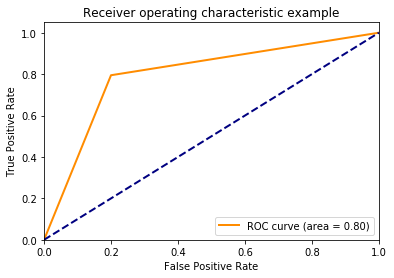

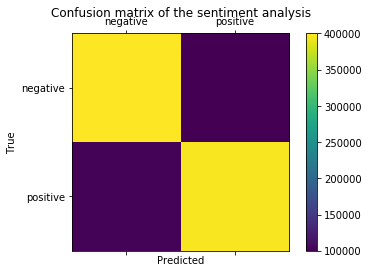

In [169]:
X_train, y_train = df_train_data.tweet, df_train_data.target
X_test, y_test = df_test_data.tweet, df_test_data.target
clf = MultinomialNB()
tf_vectorizer = TfidfVectorizer(ngram_range=(1,3), max_features=90000)
X_train = tf_vectorizer.fit_transform(X_train)
X_test = tf_vectorizer.transform(X_test)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

acc_score = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(acc_score)
print(cm)

print(classification_report(y_test, y_pred, digits=4))
fpr = dict()
tpr = dict()
roc_auc = dict()

fpr, tpr, _ = roc_curve(y_test, y_pred, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

plot_cm(cm)

### Final Model SVM

In [6]:
def plot_auc(label, prediction):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    fpr, tpr, _ = roc_curve(label, prediction, pos_label=1)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [28]:
def sentiment_svm(train, test, C, frac = 1, max_features = None, kernel='linear', ngram_range=(1,3), gamma=0):
    X_train, y_train = train.sample(frac=frac, random_state=1234).tweet, train.sample(frac=frac, random_state=1234).target
    X_test, y_test = test.sample(frac=frac, random_state=1234).tweet, test.sample(frac=frac, random_state=1234).target

    tf_vectorizer = TfidfVectorizer(ngram_range=ngram_range, max_features=max_features)
    X_train = tf_vectorizer.fit_transform(X_train)
    X_test = tf_vectorizer.transform(X_test)

    #svd = TruncatedSVD(n_components=10)
    #X_train = svd.fit_transform(X_train)
    #X_test = svd.transform(X_test)
    
    if kernel == 'linear':
        svm = LinearSVC(C=C)
    else:
        svm = SVC(C=C, gamma=gamma)
        
    print(svm)    
    
    t0 = time()
    svm.fit(X_train, y_train)
    train_test_time = time() - t0
    print("training time: {0:.2f}s".format(train_test_time))
    
    y_pred = svm.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    print("Model accuracy = {0:.3f}%".format(acc_score*100))
    print(classification_report(y_test, y_pred, digits=4))

    plot_auc(y_test, y_pred)
    plot_cm(cm)

LinearSVC(C=0.5, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
training time: 144.73s
Model accuracy = 82.026%
              precision    recall  f1-score   support

           0     0.8093    0.8380    0.8234    500000
           1     0.8320    0.8025    0.8170    500000

   micro avg     0.8203    0.8203    0.8203   1000000
   macro avg     0.8207    0.8203    0.8202   1000000
weighted avg     0.8207    0.8203    0.8202   1000000



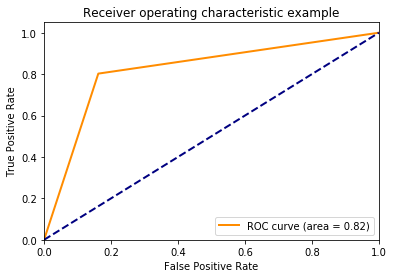

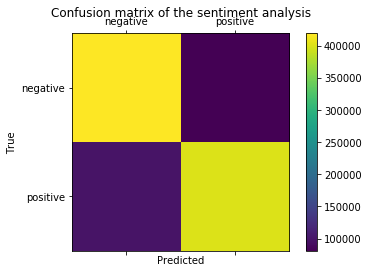

In [29]:
sentiment_svm(df_train_data, df_test_data, 0.5)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Model accuracy = 77.604%
              precision    recall  f1-score   support

           0     0.7606    0.8090    0.7841     25129
           1     0.7938    0.7427    0.7674     24871

   micro avg     0.7760    0.7760    0.7760     50000
   macro avg     0.7772    0.7759    0.7757     50000
weighted avg     0.7771    0.7760    0.7758     50000



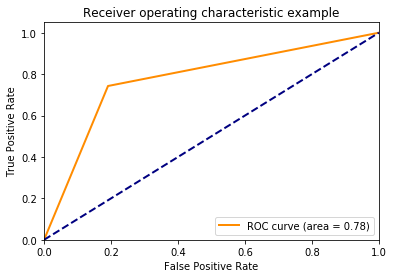

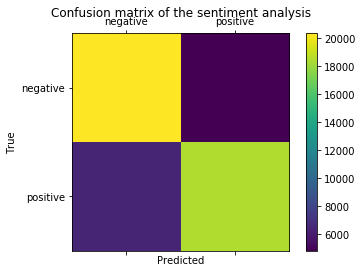

In [13]:
sentiment_svm(df_train_data, df_test_data, C=10, frac=0.05, kernel='rbf', gamma=0.1)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Model accuracy = 60.915%
              precision    recall  f1-score   support

           0     0.6093    0.6099    0.6096     50036
           1     0.6090    0.6084    0.6087     49964

   micro avg     0.6091    0.6091    0.6091    100000
   macro avg     0.6091    0.6091    0.6091    100000
weighted avg     0.6091    0.6091    0.6091    100000



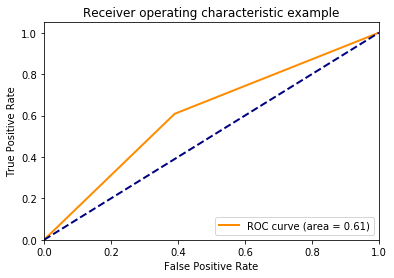

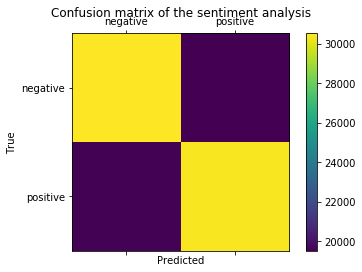

In [25]:
sentiment_svm(df_train_data, df_test_data, C=10, frac=0.1, kernel='rbf', gamma=0.1)

### Neural Net Model

In [12]:
import torch
from torchtext import data
from torchtext import datasets

In [11]:
SEED = 1234
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

TEXT = data.Field(tokenize='spacy')
LABEL = data.LabelField(dtype=torch.float)

In [13]:
train_data, test_data = datasets.IMDB.splits(TEXT, LABEL)

downloading aclImdb_v1.tar.gz


.data\imdb\aclImdb_v1.tar.gz: 100%|███████████████████████████████████████████████| 84.1M/84.1M [01:14<00:00, 1.13MB/s]


KeyboardInterrupt: 

In [41]:
from keras.layers import *
from keras.models import Model
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.utils import shuffle

In [21]:
df_train_data.drop(['target_'], axis=1, inplace=True)
df_train_data.head()

,tweet,target
0,dived many times for the ball managed to save ...,0
1,not the whole crew,0
2,nope they did not have it,0
3,spring break in plain city it snowing,0
4,could not bear to watch it and thought the ua ...,0


In [26]:
X_train = list(df_train_data.tweet)
X_test = list(df_test_data.tweet)

In [40]:
y_train = [[1,0] if x == 0 else [0,1] for x in df_train_data.target]
y_test = [[1,0] if x == 0 else [0,1] for x in df_test_data.target]

In [42]:
X_train, y_train = shuffle(X_train, y_train)
X_test, y_test = shuffle(X_test, y_test)

y_train = np.array(y_train)
y_test = np.array(y_test)

In [43]:
max_feature = 5000
maxlen = 128
embed_size = 64

In [44]:
tokenizer = Tokenizer(num_words=max_feature)
tokenizer.fit_on_texts(X_train)

In [45]:
token_train = tokenizer.texts_to_sequences(X_train)
token_test = tokenizer.texts_to_sequences(X_test)

In [54]:
X_train_final = pad_sequences(token_train, maxlen=maxlen, padding='post')
X_test_final = pad_sequences(token_test, maxlen=maxlen, padding='post')

In [56]:
input = Input(shape=(maxlen,))
net = Embedding(max_feature, embed_size)(input)
net = Dropout(0.2)(net)
net = BatchNormalization()(net)

net = Conv1D(32, 7, padding='same', activation='relu')(net)
net = BatchNormalization()(net)
net = Conv1D(32, 3, padding='same', activation='relu')(net)
net = BatchNormalization()(net)
net = Conv1D(32, 3, padding='same', activation='relu')(net)
net = BatchNormalization()(net)
net = Conv1D(32, 3, padding='same', activation='relu')(net)
net1 = BatchNormalization()(net)

net = Conv1D(2, 1)(net)
net = GlobalAveragePooling1D()(net)
output = Activation('softmax')(net)
model = Model(inputs = input, outputs = output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 128)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 128, 64)           320000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128, 64)           0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 64)           256       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 128, 32)           14368     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128, 32)           128       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 128, 32)           3104      
__________

In [ ]:
model.fit(X_train_final, y_train, batch_size=2048, epochs=5, validation_split=0.1)

Train on 507264 samples, validate on 56363 samples
Epoch 1/5
 30720/507264 [>.............................] - ETA: 13:01:30 - loss: 0.6706 - acc: 0.5858